## Importing necessary libraries

In [2]:
# importing needed libraries
import torch # base library for pytorch
from PIL import Image, ImageOps # for reading and dealing with images
import torchvision.transforms as transforms # for converting PIL images to pytorch tensors
import torch.nn as nn # for making neural networks in pytorch
import torch.optim as optim # for optimizing the parameters using different optimizers like Adam, ...
import matplotlib.pyplot as plt # for plotting the model loss in each epoch
import numpy as np

## Reading and Pre-Processing images
  - reading images using PIL library
  - converting to grayscale
  - converting PIL Image objects to pytorch tensor using torchvision.transforms
  - stacking all images into one single tensor
  - removing dimensions equal to 1
  - make pixel values between 0 and 255

In [8]:
# reading images
images = []
image1 = Image.open('Q5_1.png')
image2 = Image.open('Q5_2.png')
image3 = Image.open('Q5_3.png')
image1 = ImageOps.grayscale(image1)
image2 = ImageOps.grayscale(image2)
image3 = ImageOps.grayscale(image3)

# Convert the PIL image to Torch tensor
images.append(transforms.ToTensor()(image1))
images.append(transforms.ToTensor()(image2))
images.append(transforms.ToTensor()(image3))
# stacking the list of tensors to give us a single tensor of tensors
images = torch.stack(images)
# removing dimensions equal to 1
images = torch.squeeze(images)
images = images * 255


## Preparing the labels for each input

In [10]:
# preparing the labels in a pytorch tensor
y = torch.tensor([0,1,2], dtype=torch.long)

In [11]:
print(images.shape)

torch.Size([3, 461, 512])


## Defining The model using Sequential API

In [54]:
# defining some variables
width, height = images.shape[-2], images.shape[-1]
num_of_classes = 3
d_hidden = 20
# defining a neural network model using Sequential API in torch.nn
model = nn.Sequential(
    # to make the matrice of input image flattened so that it can be fed into the model
    nn.Flatten(),
    # a linear layer: first parameter: number of neurons of previous layer | second parameter: number of neurons of this layer
    nn.Linear(width*height, d_hidden),
    # Tanh activation function
    nn.Tanh(),
    # another linear layer. This is the last layer and should contain number of neurons equal to number of classes, so that we can make the final decision
    nn.Linear(d_hidden, num_of_classes),
    # Applying Softmax activation function to take the logits into a probabilty distribution
    nn.Softmax()
)
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=236032, out_features=20, bias=True)
  (2): Tanh()
  (3): Linear(in_features=20, out_features=3, bias=True)
  (4): Softmax(dim=None)
)


## Defining loss function and the optimizer

In [55]:
# our loss function is Categorical Cross Entropy as most of the classification tasks
loss_fn = nn.CrossEntropyLoss()  # categorical cross entropy
# using SGC optimizer to be responsible for updating parameters
optimizer = optim.SGD(model.parameters(), lr=0.3, momentum=0.9)

## Training the model

In [56]:
n_epochs = 200 # number of epochs, our model is going to be trained
losses = [] # gathering losses in each epoch for further analysis
for epoch in range(n_epochs):
    y_pred = model(images) # prediction of the model on the images
    loss = loss_fn(y_pred, y) # computing loss
    optimizer.zero_grad()
    loss.backward() # computing gradient of loss with respect to every parameter
    optimizer.step() # updating every parameter based on its gradient computed in the previous line
    if epoch % 10 == 0:
      print(f'Finished epoch {epoch}, latest loss {loss}')
    losses.append(loss.item()) # gathering losses in each epoch for further analysis

Finished epoch 0, latest loss 1.1447914838790894
Finished epoch 10, latest loss 0.6487715244293213
Finished epoch 20, latest loss 0.5599068999290466
Finished epoch 30, latest loss 0.553856611251831
Finished epoch 40, latest loss 0.5529782772064209
Finished epoch 50, latest loss 0.5527560710906982
Finished epoch 60, latest loss 0.5526251792907715
Finished epoch 70, latest loss 0.5525519251823425
Finished epoch 80, latest loss 0.5525042414665222
Finished epoch 90, latest loss 0.5524659156799316
Finished epoch 100, latest loss 0.5524328351020813
Finished epoch 110, latest loss 0.5524031519889832
Finished epoch 120, latest loss 0.552375316619873
Finished epoch 130, latest loss 0.5523493885993958
Finished epoch 140, latest loss 0.5523248314857483
Finished epoch 150, latest loss 0.5523016452789307
Finished epoch 160, latest loss 0.5522797107696533
Finished epoch 170, latest loss 0.5522587895393372
Finished epoch 180, latest loss 0.5522390604019165
Finished epoch 190, latest loss 0.5522201657

## Plotting the loss values

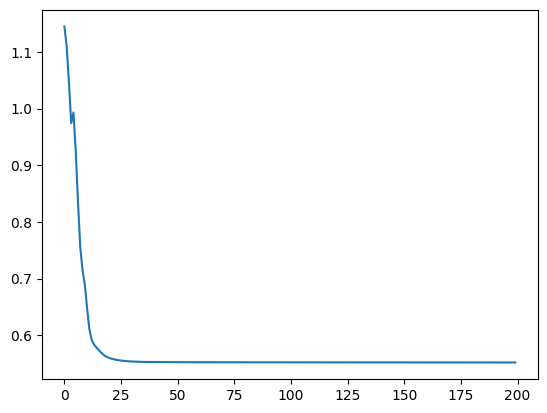

In [58]:
# plotting the loss value in each epoch
plt.plot(np.arange(n_epochs), losses)

## Computing accuracy

In [59]:
# computing the accuracy
with torch.no_grad(): # torch.no_grad indicates that we are not in training phase
    y_pred = model(images)
accuracy = torch.sum((y_pred.argmax(dim=1) == y)) # computing number of correct predictions based on the maximum probability
print(f"Accuracy: {accuracy.item() / 3}") # computing final accuracy

Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
